<a href="https://colab.research.google.com/github/IsabelleFSNunes/MachineLearning_IA048_2024_2/blob/main/PC02_ClassificationHAR_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Database: human activity recognition




Connect with database
---
- The local connection with spreadsheet

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

path_drive='/content/gdrive/MyDrive/Mestrado/ML-IA048-2024S1/T02'

Mounted at /content/gdrive/


### Internal Features available

In [3]:
feature_name_df = pd.read_csv(f'{path_drive}/UCI_HAR_Dataset/features.txt' ,
                             sep = '\s+',
                             header = None,
                             names = ['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:, 1].values.tolist()

print(feature_name)

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tG

In [4]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                 columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),
                                  feature_dup_df,
                                  how = 'outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0] + '_' + str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

### Initialization of Train and Test Data

In [5]:
# train과 test directory에 있는 data file을 각각 train/test dataframe에 할당
# dataframe 생성하는 간단한 함수 생성

def get_human_dataset():
  path_drive='/content/gdrive/MyDrive/Mestrado/ML-IA048-2024S1/T02'
  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep로 할당
  feature_name_df = pd.read_csv(f'{path_drive}/UCI_HAR_Dataset/features.txt', sep = '\s+', header = None, names = ['column_index', 'column_name'])

  # 중복된 feature명을 수정하는 get_new_feature_name_df()를 이용, 신규 feature명 dataframe 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # dataframe에서 feature명을 column으로 부여하기 위해 list 객체로 반환
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

  # train feature dataset와 test feature dataset을 dataframe으로 load. column명은 feature_name 적용
  X_train = pd.read_csv(f'{path_drive}/UCI_HAR_Dataset/train/X_train.txt',
                        sep = '\s+',
                        names = feature_name)
  X_test = pd.read_csv(f'{path_drive}/UCI_HAR_Dataset/test/X_test.txt',
                      sep = '\s+',
                      names = feature_name)
  # column명을 subject 부여
  X_train['subject'] = pd.read_csv(f'{path_drive}/UCI_HAR_Dataset/train/subject_train.txt',
                        sep = '\s+',
                        header = None,
                        names = ['subject'])
  X_test['subject'] = pd.read_csv(f'{path_drive}/UCI_HAR_Dataset/test/subject_test.txt',
                      sep = '\s+',
                      header = None,
                      names = ['subject'])

  # column명을 action으로 부여
  y_train = pd.read_csv(f'{path_drive}/UCI_HAR_Dataset/train/y_train.txt',
                        sep = '\s+',
                        header = None,
                        names = ['action'])
  y_test = pd.read_csv(f'{path_drive}/UCI_HAR_Dataset/test/y_test.txt',
                      sep = '\s+',
                      header = None,
                      names = ['action'])

  return X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [7]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30


### Summary of train database

In [8]:
dict_classes= { 1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING',
               '1':'WALKING', '2':'WALKING_UPSTAIRS', '3':'WALKING_DOWNSTAIRS', '4':'SITTING', '5':'STANDING', '6':'LAYING'}
y_train_labels = y_train.replace(dict_classes)
train = X_train.copy()
train['Activity'] = y_train.copy()
train['ActivityName'] = y_train_labels.copy()
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
7013,0.265184,-0.061877,-0.081252,-0.979788,-0.874275,-0.940448,-0.983432,-0.874894,-0.93855,-0.928201,...,0.011608,-0.413077,0.216438,-0.73097,-0.78313,0.107366,-0.13947,30,4,SITTING


In [9]:
print(X_train.info())
print(y_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 562 entries, tBodyAcc-mean()-X to subject
dtypes: float64(561), int64(1)
memory usage: 31.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   action  7352 non-null   int64
dtypes: int64(1)
memory usage: 57.6 KB
None


In [10]:
print(X_train.describe())
print(y_train.describe())

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -1.000000   


In [11]:
X_test.describe()
y_test.describe()

,action
count,2947.000000
mean,3.577876
std,1.740348
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,6.000000


In [12]:
X_test.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 562 entries, tBodyAcc-mean()-X to subject
dtypes: float64(561), int64(1)
memory usage: 12.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   action  2947 non-null   int64
dtypes: int64(1)
memory usage: 23.1 KB


### Visualize the database

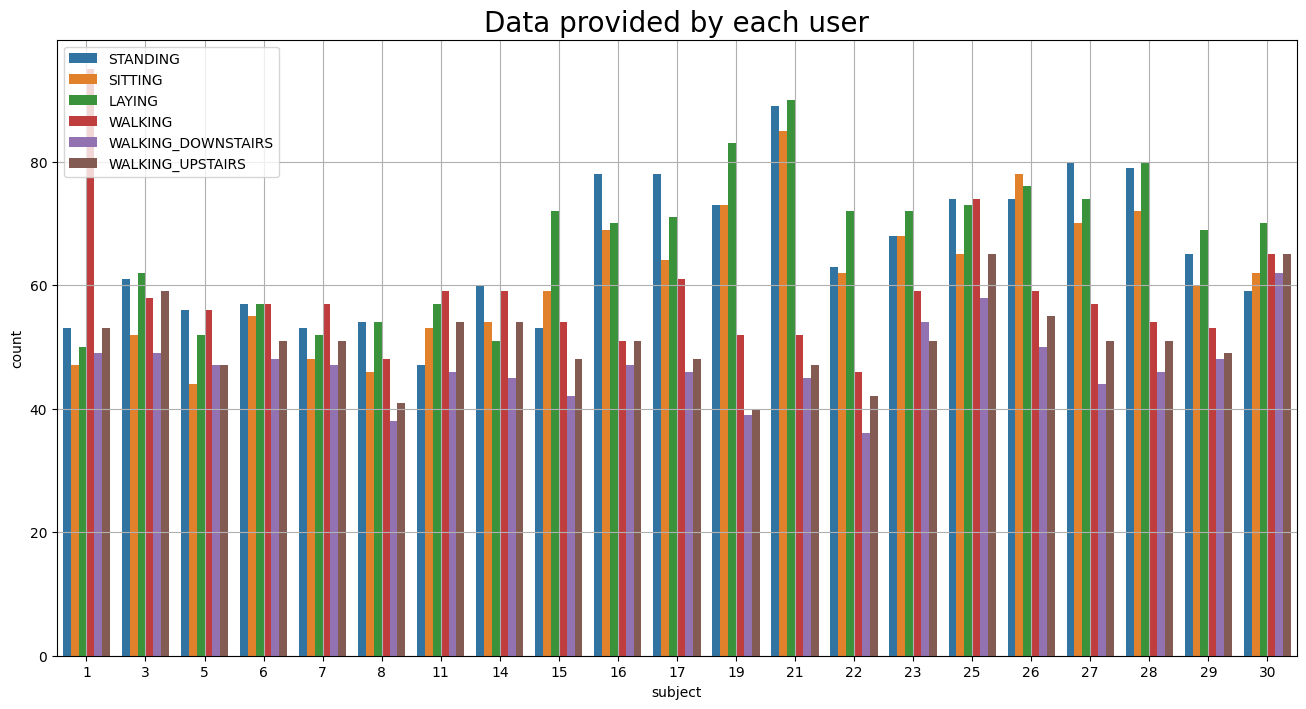

In [13]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
sns.set_palette("colorblind")
plt.legend(loc='best')
plt.grid()
plt.savefig(f'{path_drive}/fig01_Data_Users.eps', format='eps')
plt.show()

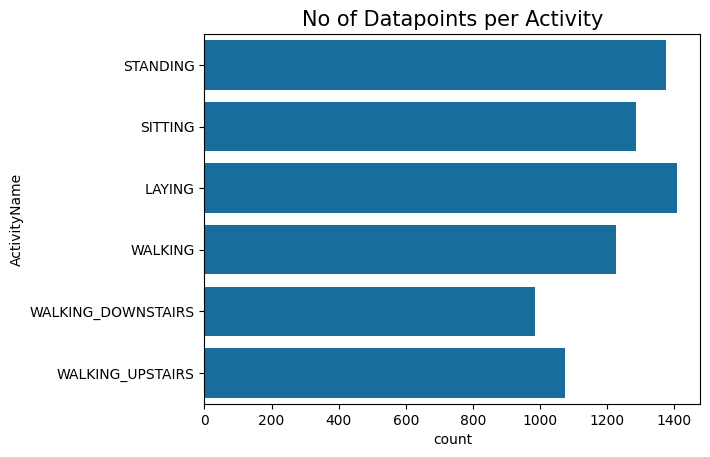

In [14]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks()
plt.savefig(f'{path_drive}/fig02_NDatapointsPerActivity.eps', format='eps')
plt.show()

# Logistic Regression

### Apply the default method of logistic regression analysis

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
lr= LogisticRegression(multi_class='ovr')
model= lr.fit(X_train, np.ravel(y_train))

pred_lr= model.predict(X_test)
print( confusion_matrix(y_test, pred_lr) )

train_acc= model.score(X_train, y_train)
test_acc= model.score(X_test, y_test)
n=1
# acc_list_train.append( train_acc )
# acc_list_test.append( test_acc )
print('\n\n >%d, train: %.3f, test: %.3f' %(n, train_acc, test_acc))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[494   0   2   0   0   0]
 [ 22 449   0   0   0   0]
 [  4   9 407   0   0   0]
 [  0   3   0 429  59   0]
 [  2   0   0  12 518   0]
 [  0   0   0   0   0 537]]


 >1, train: 0.991, test: 0.962


In [17]:
lr2= LogisticRegression(multi_class='ovr', solver='liblinear')
model2= lr2.fit(X_train, np.ravel(y_train))

pred_lr2= model2.predict(X_test)
print( confusion_matrix(y_test, pred_lr2) )

train_acc2= model2.score(X_train, y_train)
test_acc2= model2.score(X_test, y_test)
n=2
# acc_list_train.append( train_acc )
# acc_list_test.append( test_acc )
print('\n\n >%d, train: %.3f, test: %.3f' %(n, train_acc2, test_acc2) )

[[494   0   2   0   0   0]
 [ 22 449   0   0   0   0]
 [  4   8 408   0   0   0]
 [  0   3   0 429  59   0]
 [  2   0   0  13 517   0]
 [  0   0   0   0   0 537]]


 >2, train: 0.991, test: 0.962


In [18]:
n=3

lr3= LogisticRegression(multi_class='ovr', solver='liblinear', penalty='l1')
model3= lr3.fit(X_train, np.ravel(y_train))

pred_lr3= model3.predict(X_test)
print( confusion_matrix(y_test, pred_lr3) )

train_acc3= model3.score(X_train, y_train)
test_acc3= model3.score(X_test, y_test)

# acc_list_train.append( train_acc )
# acc_list_test.append( test_acc )
print('\n\n >%d, train: %.3f, test: %.3f' %(n, train_acc3, test_acc3) )

[[495   0   1   0   0   0]
 [ 22 449   0   0   0   0]
 [  4   8 408   0   0   0]
 [  0   4   0 423  64   0]
 [  2   0   0  10 520   0]
 [  0   0   0   0   0 537]]


 >3, train: 0.992, test: 0.961


In [19]:
n=4

lr4= LogisticRegression(multi_class='multinomial', solver='newton-cg')
model4= lr4.fit(X_train, np.ravel(y_train))

pred_lr4= model4.predict(X_test)
print( confusion_matrix(y_test, pred_lr4) )

train_acc4= model4.score(X_train, y_train)
test_acc4= model4.score(X_test, y_test)

# acc_list_train.append( train_acc )
# acc_list_test.append( test_acc )
print('\n\n >%d, train: %.3f, test: %.3f' %(n, train_acc4, test_acc4) )

[[493   0   3   0   0   0]
 [ 26 445   0   0   0   0]
 [  3  10 407   0   0   0]
 [  0   3   0 425  63   0]
 [  1   0   0  10 521   0]
 [  0   0   0   0   0 537]]


 >4, train: 0.993, test: 0.960


In [20]:
n=5

lr5= LogisticRegression(multi_class='multinomial')
model5= lr5.fit(X_train, np.ravel(y_train))

pred_lr5= model5.predict(X_test)
print( confusion_matrix(y_test, pred_lr4) )

train_acc5= model5.score(X_train, y_train)
test_acc5= model5.score(X_test, y_test)

# acc_list_train.append( train_acc )
# acc_list_test.append( test_acc )
print('\n\n >%d, train: %.3f, test: %.3f' %(n, train_acc5, test_acc5) )

[[493   0   3   0   0   0]
 [ 26 445   0   0   0   0]
 [  3  10 407   0   0   0]
 [  0   3   0 425  63   0]
 [  1   0   0  10 521   0]
 [  0   0   0   0   0 537]]


 >5, train: 0.988, test: 0.952


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Com base nos valores de acurácia obtido nas execuções anteriores, foi selecionado a Execução 4 para dar prosseguimento dos outros reports e matriz de confusão:

In [21]:
print( confusion_matrix(y_test, pred_lr) )
print( classification_report(y_test, pred_lr) )

[[494   0   2   0   0   0]
 [ 22 449   0   0   0   0]
 [  4   9 407   0   0   0]
 [  0   3   0 429  59   0]
 [  2   0   0  12 518   0]
 [  0   0   0   0   0 537]]
              precision    recall  f1-score   support

           1       0.95      1.00      0.97       496
           2       0.97      0.95      0.96       471
           3       1.00      0.97      0.98       420
           4       0.97      0.87      0.92       491
           5       0.90      0.97      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [22]:
print( confusion_matrix(y_test, pred_lr2) )
print( classification_report(y_test, pred_lr2) )

[[494   0   2   0   0   0]
 [ 22 449   0   0   0   0]
 [  4   8 408   0   0   0]
 [  0   3   0 429  59   0]
 [  2   0   0  13 517   0]
 [  0   0   0   0   0 537]]
              precision    recall  f1-score   support

           1       0.95      1.00      0.97       496
           2       0.98      0.95      0.96       471
           3       1.00      0.97      0.98       420
           4       0.97      0.87      0.92       491
           5       0.90      0.97      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



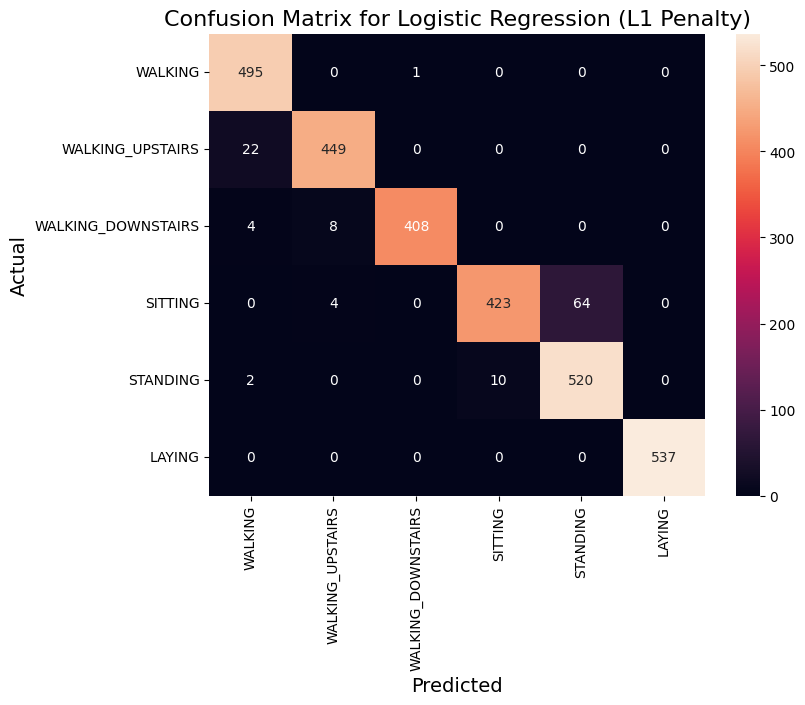

In [23]:
# Get the confusion matrix
cm = confusion_matrix(y_test, pred_lr3)
class_names = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix for Logistic Regression (L1 Penalty)", fontsize=16)

# Save the plot
plt.savefig(f'{path_drive}/fig03_ConfusionMatrix_LR_L1.eps', format='eps')

# Show the plot
plt.show()


In [24]:
print( confusion_matrix(y_test, pred_lr3) )
print( classification_report(y_test, pred_lr3) )

[[495   0   1   0   0   0]
 [ 22 449   0   0   0   0]
 [  4   8 408   0   0   0]
 [  0   4   0 423  64   0]
 [  2   0   0  10 520   0]
 [  0   0   0   0   0 537]]
              precision    recall  f1-score   support

           1       0.95      1.00      0.97       496
           2       0.97      0.95      0.96       471
           3       1.00      0.97      0.98       420
           4       0.98      0.86      0.92       491
           5       0.89      0.98      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [25]:
# prompt: plotar confusion_matrix(y_test, pred_lr3)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_matrix( y_test=[], pred_lr=[], title="Logistic Regression (newton-cg)", cm=[]):
  # Get the confusion matrix
  if len(cm) == 0:
    cm = confusion_matrix(y_test, pred_lr4)

  class_names = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
  # Create a heatmap of the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)

  # Add labels and title
  plt.xlabel("Predicted", fontsize=14)
  plt.ylabel("Actual", fontsize=14)
  plt.title(f'Confusion Matrix for {title}', fontsize=16)

  # Save the plot
  plt.savefig(f'{path_drive}/fig04_ConfusionMatrix_{title}.eps', format='eps')

  # Show the plot
  plt.show()


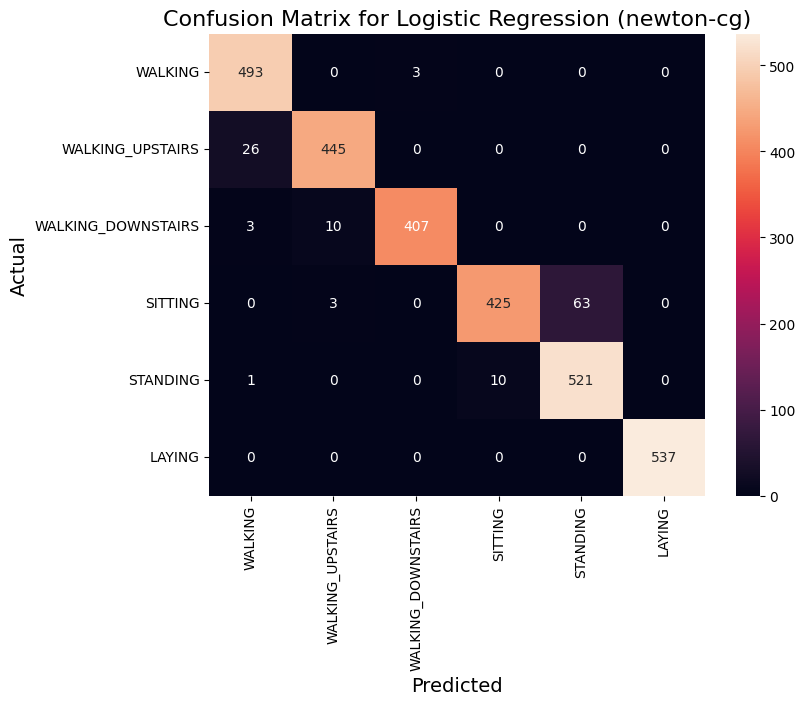

In [26]:
plot_conf_matrix( y_test, pred_lr4, "Logistic Regression (newton-cg)")

In [27]:
print( confusion_matrix(y_test, pred_lr4) )
print( classification_report(y_test, pred_lr4) )

[[493   0   3   0   0   0]
 [ 26 445   0   0   0   0]
 [  3  10 407   0   0   0]
 [  0   3   0 425  63   0]
 [  1   0   0  10 521   0]
 [  0   0   0   0   0 537]]
              precision    recall  f1-score   support

           1       0.94      0.99      0.97       496
           2       0.97      0.94      0.96       471
           3       0.99      0.97      0.98       420
           4       0.98      0.87      0.92       491
           5       0.89      0.98      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [28]:
print( confusion_matrix(y_test, pred_lr5) )
print( classification_report(y_test, pred_lr5) )

[[486   6   4   0   0   0]
 [ 23 438  10   0   0   0]
 [  6   9 405   0   0   0]
 [  0   2   0 427  61   1]
 [  0   0   0  18 514   0]
 [  0   0   0   0   0 537]]
              precision    recall  f1-score   support

           1       0.94      0.98      0.96       496
           2       0.96      0.93      0.95       471
           3       0.97      0.96      0.97       420
           4       0.96      0.87      0.91       491
           5       0.89      0.97      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



### Drafts

In [29]:
lr2 = LogisticRegression(multi_class='ovr', solver='liblinear')
model = lr.fit(X_train, np.ravel(y_train))

accuracy = model.score(X_test, y_test)
print("Accuracy is {}".format(accuracy))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is 0.9616559212758737


In [30]:
print(f'Index:{X_test.iloc[50][X_test.iloc[50] != 0 ].keys() }')
print(f'Action: {y_test.iloc[50]}')

Index:Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=562)
Action: action    4
Name: 50, dtype: int64


In [31]:
test = X_test.iloc[50].values.reshape(-1, 1).T
proba = model.predict_proba(test)
classes = model.classes_
resultdf = pd.DataFrame(data=proba, columns=classes)

toppred = resultdf.T.sort_values(by=[0], ascending=[False])
toppred.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,0
5,8.182112e-01
4,1.817122e-01
6,7.619224e-05
3,3.138748e-07
2,4.966772e-08


In [32]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97       496
           2       0.97      0.95      0.96       471
           3       1.00      0.97      0.98       420
           4       0.97      0.87      0.92       491
           5       0.90      0.97      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



# KNN - Classification

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier( n_neighbors=1 )
knn.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [34]:
pred= knn.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score
confusion_matrix(y_test, pred)

array([[420,  29,  47,   0,   0,   0],
       [ 96, 337,  38,   0,   0,   0],
       [ 61,  30, 329,   0,   0,   0],
       [  0,   2,   0, 313, 176,   0],
       [  1,   0,   0,  85, 446,   0],
       [  0,   0,   0,  15,  13, 509]])

In [36]:
print( classification_report(y_test, pred) )

              precision    recall  f1-score   support

           1       0.73      0.85      0.78       496
           2       0.85      0.72      0.78       471
           3       0.79      0.78      0.79       420
           4       0.76      0.64      0.69       491
           5       0.70      0.84      0.76       532
           6       1.00      0.95      0.97       537

    accuracy                           0.80      2947
   macro avg       0.80      0.79      0.80      2947
weighted avg       0.81      0.80      0.80      2947



In [37]:
knn2= KNeighborsClassifier( n_neighbors=2 )
knn2.fit(X_train, y_train)

pred2= knn2.predict(X_test)
conf2 = confusion_matrix(y_test, pred)
print(conf2 )
print( classification_report(y_test, pred2) )

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[420  29  47   0   0   0]
 [ 96 337  38   0   0   0]
 [ 61  30 329   0   0   0]
 [  0   2   0 313 176   0]
 [  1   0   0  85 446   0]
 [  0   0   0  15  13 509]]
              precision    recall  f1-score   support

           1       0.68      0.91      0.78       496
           2       0.87      0.70      0.78       471
           3       0.86      0.71      0.78       420
           4       0.70      0.79      0.74       491
           5       0.78      0.74      0.76       532
           6       1.00      0.92      0.96       537

    accuracy                           0.80      2947
   macro avg       0.81      0.80      0.80      2947
weighted avg       0.82      0.80      0.80      2947



In [38]:
def get_df_scores_to_each_class(res=pd.DataFrame(), n_classes=1, n_label={}):
  lines= res.split('\n')

  ## In this case, we apply to HAR database inertial sensors
  ## n_classes is 6
  # print(lines[0])   ## header -  name     precision    recall  f1-score   support
  # print(lines[1])   ## class 1 - 'WALKING'
  # print(lines[2])   ## class 2 - 'WALKING_UPSTAIRS'
  # print(lines[3])   ## class 3 - 'WALKING_DOWNSTAIRS'
  # print(lines[4])   ## class 4 - 'SITTING'
  # print(lines[5])   ## class 5 - 'STANDING'
  # print(lines[6])   ## class 6 - 'LAYING'

  name_list= ['class', 'precision', 'recall', 'f1-score', 'support']

  # Remove linhas vazias do final e inicial
  lines = [line for line in lines if line.strip()]
  lines = [line.split() for line in lines[1 : n_classes+1 ]]

  # Transforma as métricas em um DataFrame
  res_df = pd.DataFrame(lines, columns=name_list)

  if len(n_label) == 0:  # Se a lista estiver vazia
    n_label = range(n_classes)
  # obs: to verify if the dictionary of class considering 'string' : 'string', such as, '3': 'WALKING_DOWNSTAIRS' and 3:'WALKING_DOWNSTAIRS'
  else:
    res_df['class'] = res_df['class'].replace(n_label)
  return res_df



In [39]:
res_df = get_df_scores_to_each_class( classification_report(y_test, pred2), 6, dict_classes)

In [40]:
knn3= KNeighborsClassifier( n_neighbors=3 )
knn3.fit(X_train, y_train)

pred3= knn3.predict(X_test)
accuracy = model.score(X_test, y_test)
confusion_matrix(y_test, pred3)
print( classification_report(y_test, pred3) )

res_df = get_df_scores_to_each_class( classification_report(y_test, pred3), 6, dict_classes)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           1       0.71      0.87      0.78       496
           2       0.85      0.72      0.78       471
           3       0.82      0.75      0.78       420
           4       0.78      0.67      0.72       491
           5       0.73      0.86      0.79       532
           6       1.00      0.95      0.97       537

    accuracy                           0.81      2947
   macro avg       0.81      0.80      0.80      2947
weighted avg       0.81      0.81      0.81      2947



### Trainning with differents k in loop

In [41]:
acc_list_test = []
acc_list_train = []

acc_mac_list = []
acc_weight_avg = []

y_train_labels

precision = []
recall = []
f1_score = []
support = []

pred_k_list = []
conf_matrix_k = []
result_k_list = []

n_classes = 6

# Inicializa as listas de precisão, recall, f1-score e support para cada classe
for _ in range(n_classes):
    precision.append([])
    recall.append([])
    f1_score.append([])
    support.append([])

n_range=51
for k in range(1, n_range+1):
  knn_k= KNeighborsClassifier( n_neighbors= k )
  result_k= knn_k.fit(X_train, y_train.values.ravel())

  result_k_list.append(result_k)

  pred_k= knn_k.predict(X_test)
  pred_k_list.append(pred_k)

  conf_matrix_k.append( confusion_matrix(y_test, pred_k) )


  train_acc= knn_k.score(X_train, y_train)
  test_acc= knn_k.score(X_test, y_test)

  acc_list_train.append( train_acc )
  acc_list_test.append( test_acc )
  print('>%d, train: %.3f, test: %.3f' %(k, train_acc, test_acc))

  res_df = get_df_scores_to_each_class( classification_report(y_test, pred_k), n_classes, dict_classes )

  for i in range(0,n_classes):
    precision[i].append(res_df['precision'][i])
    recall[i].append(res_df['recall'][i])
    f1_score[i].append(res_df['f1-score'][i])
    support[i].append(res_df['support'][i])


# print(precision)
# print(recall)
# print(f1_score)
# print(support)

>1, train: 1.000, test: 0.799
>2, train: 0.993, test: 0.800
>3, train: 0.996, test: 0.806
>4, train: 0.992, test: 0.810
>5, train: 0.989, test: 0.808
>6, train: 0.988, test: 0.818
>7, train: 0.984, test: 0.807
>8, train: 0.983, test: 0.812
>9, train: 0.979, test: 0.808
>10, train: 0.978, test: 0.817
>11, train: 0.977, test: 0.812
>12, train: 0.976, test: 0.812
>13, train: 0.974, test: 0.812
>14, train: 0.974, test: 0.813
>15, train: 0.971, test: 0.814
>16, train: 0.970, test: 0.813
>17, train: 0.967, test: 0.813
>18, train: 0.967, test: 0.814
>19, train: 0.963, test: 0.816
>20, train: 0.964, test: 0.815
>21, train: 0.963, test: 0.815
>22, train: 0.963, test: 0.814
>23, train: 0.962, test: 0.816
>24, train: 0.962, test: 0.814
>25, train: 0.960, test: 0.813
>26, train: 0.960, test: 0.814
>27, train: 0.957, test: 0.814
>28, train: 0.957, test: 0.815
>29, train: 0.956, test: 0.812
>30, train: 0.956, test: 0.814
>31, train: 0.954, test: 0.815
>32, train: 0.955, test: 0.812
>33, train: 0.952

#### Drafts

In [42]:
conf_matrix_k[1]

array([[452,  16,  28,   0,   0,   0],
       [118, 332,  21,   0,   0,   0],
       [ 89,  33, 298,   0,   0,   0],
       [  0,   2,   0, 390,  99,   0],
       [  1,   0,   0, 137, 394,   0],
       [  0,   0,   0,  34,  11, 492]])

In [43]:
acc_list_test

[0.7987784187309128,
 0.8001357312521208,
 0.8062436375975568,
 0.8103155751611809,
 0.8079402782490669,
 0.8181201221581269,
 0.8065829657278588,
 0.8123515439429929,
 0.8079402782490669,
 0.8174414658975229,
 0.8116728876823889,
 0.8120122158126909,
 0.8120122158126909,
 0.8126908720732948,
 0.8137088564642009,
 0.8130302002035968,
 0.8130302002035968,
 0.8143875127248049,
 0.8164234815066169,
 0.8150661689854088,
 0.8150661689854088,
 0.8140481845945029,
 0.8164234815066169,
 0.8143875127248049,
 0.8130302002035968,
 0.8143875127248049,
 0.8143875127248049,
 0.8150661689854088,
 0.8123515439429929,
 0.8143875127248049,
 0.8147268408551069,
 0.8120122158126909,
 0.8126908720732948,
 0.8116728876823889,
 0.8120122158126909,
 0.8130302002035968,
 0.8133695283338989,
 0.8113335595520869,
 0.8116728876823889,
 0.8123515439429929,
 0.8133695283338989,
 0.8137088564642009,
 0.8147268408551069,
 0.8123515439429929,
 0.8116728876823889,
 0.8130302002035968,
 0.8116728876823889,
 0.8120122158

In [44]:
acc_list_train

[1.0,
 0.9934711643090316,
 0.9963275299238302,
 0.9921109902067464,
 0.9888465723612623,
 0.9878944504896626,
 0.983949945593036,
 0.9832698585418934,
 0.9794613710554951,
 0.9779651795429815,
 0.9770130576713819,
 0.9759249183895539,
 0.9736126224156693,
 0.9738846572361263,
 0.970892274211099,
 0.9702121871599565,
 0.9670837867247007,
 0.9669477693144722,
 0.963411316648531,
 0.9642274211099021,
 0.9630032644178455,
 0.9630032644178455,
 0.9615070729053319,
 0.9619151251360174,
 0.9604189336235038,
 0.9601468988030468,
 0.9574265505984766,
 0.9570184983677911,
 0.955930359085963,
 0.95620239390642,
 0.9538900979325353,
 0.9549782372143635,
 0.9519858541893362,
 0.9530739934711643,
 0.9503536452665942,
 0.9511697497279652,
 0.9494015233949945,
 0.9502176278563657,
 0.9480413492927094,
 0.948721436343852,
 0.9470892274211099,
 0.9466811751904244,
 0.9432807399347116,
 0.9442328618063112,
 0.9427366702937976,
 0.9427366702937976,
 0.9419205658324266,
 0.941784548422198,
 0.939336235038

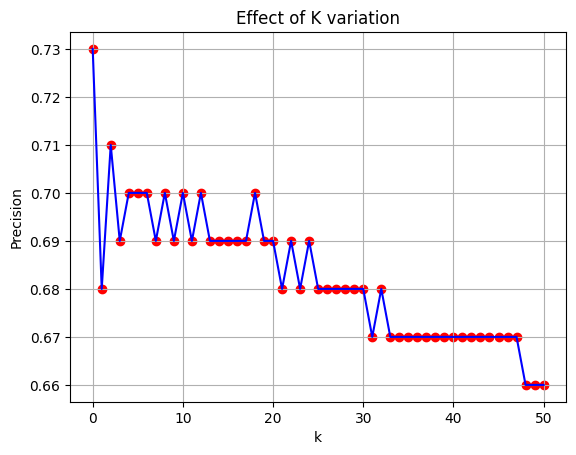

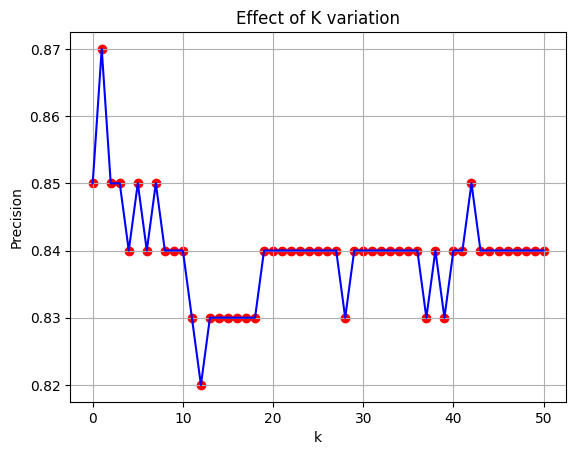

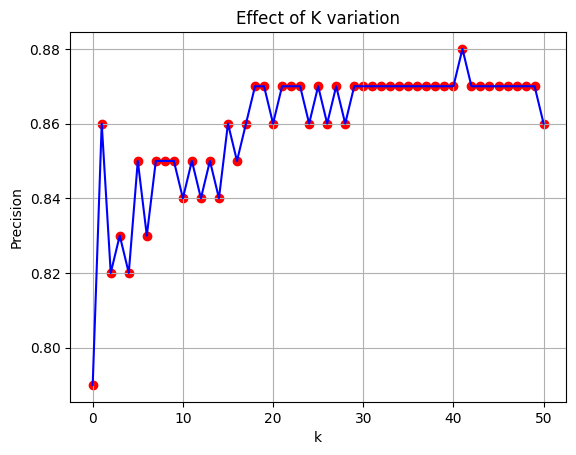

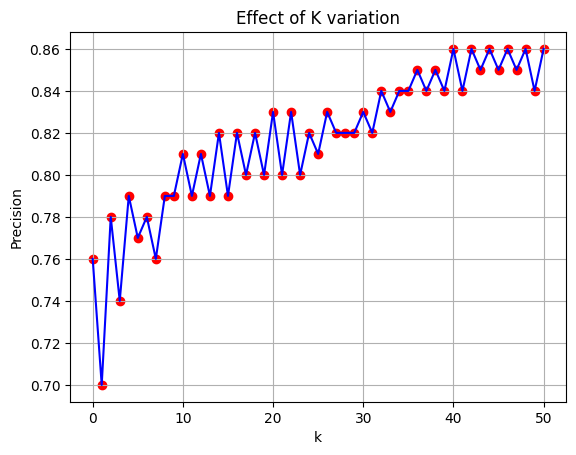

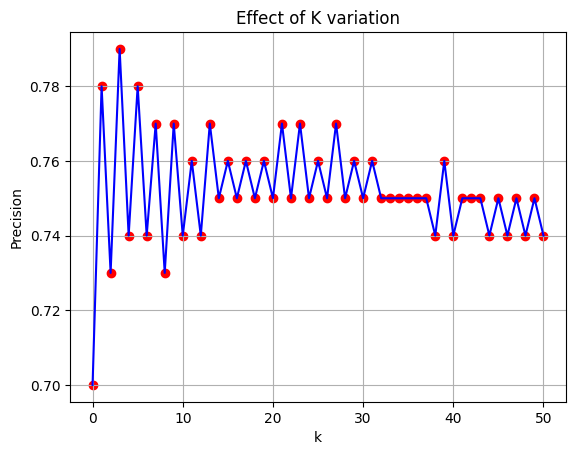

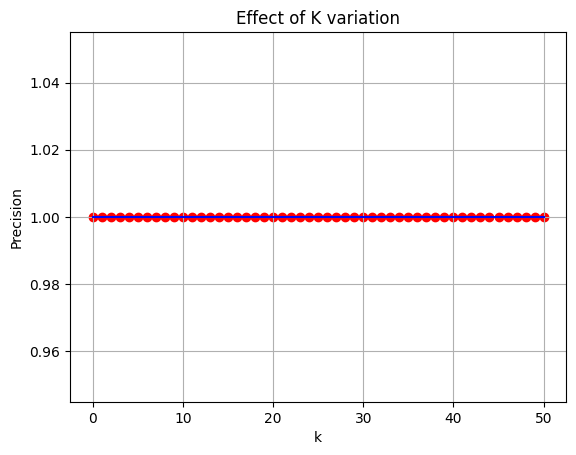

In [45]:
def plot_curves_classes(curve=[], n=1):
  plt.scatter(range(n), curve, color='red')
  plt.plot(range(n), curve, color='blue')
  plt.title('Effect of K variation')
  plt.xlabel('k')
  plt.ylabel('Precision')
  plt.grid()
  plt.show()

  return


for c in range(n_classes):
  plot_curves_classes([float(valor) for valor in precision[c]], n_range )

## Ploting the results

In [46]:
import matplotlib.pyplot as plt

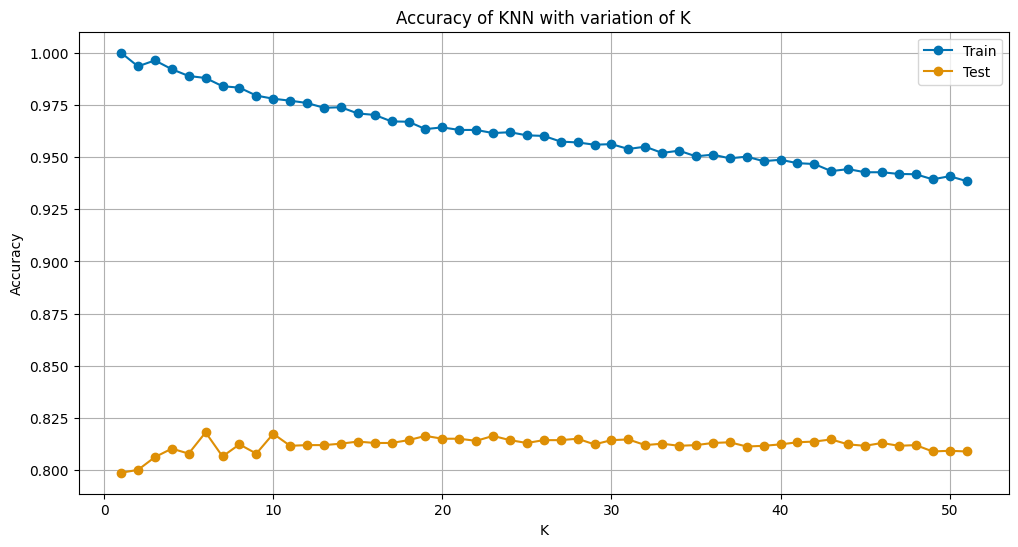

In [47]:
plt.figure(figsize=(12,6))
plt.plot(range(1, n_range+1), acc_list_train, '-o', label='Train')
plt.plot(range(1, n_range+1), acc_list_test, '-o', label='Test')
plt.legend(loc='best')
plt.title('Accuracy of KNN with variation of K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.savefig(f'{path_drive}/fig04_Accuracy_diferentes_k.eps', format='eps')
plt.show()

# falta adicionar o codigo para salvar automaticamente

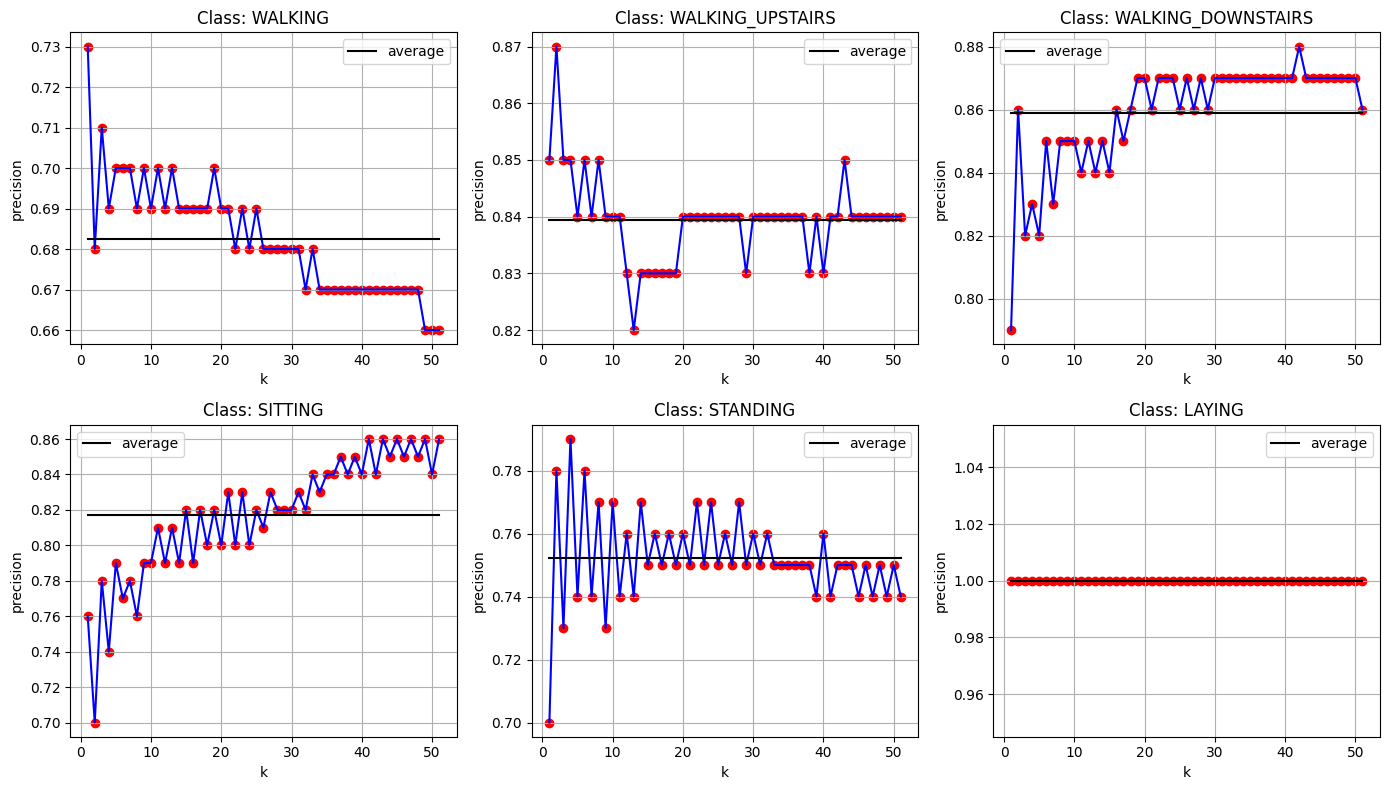

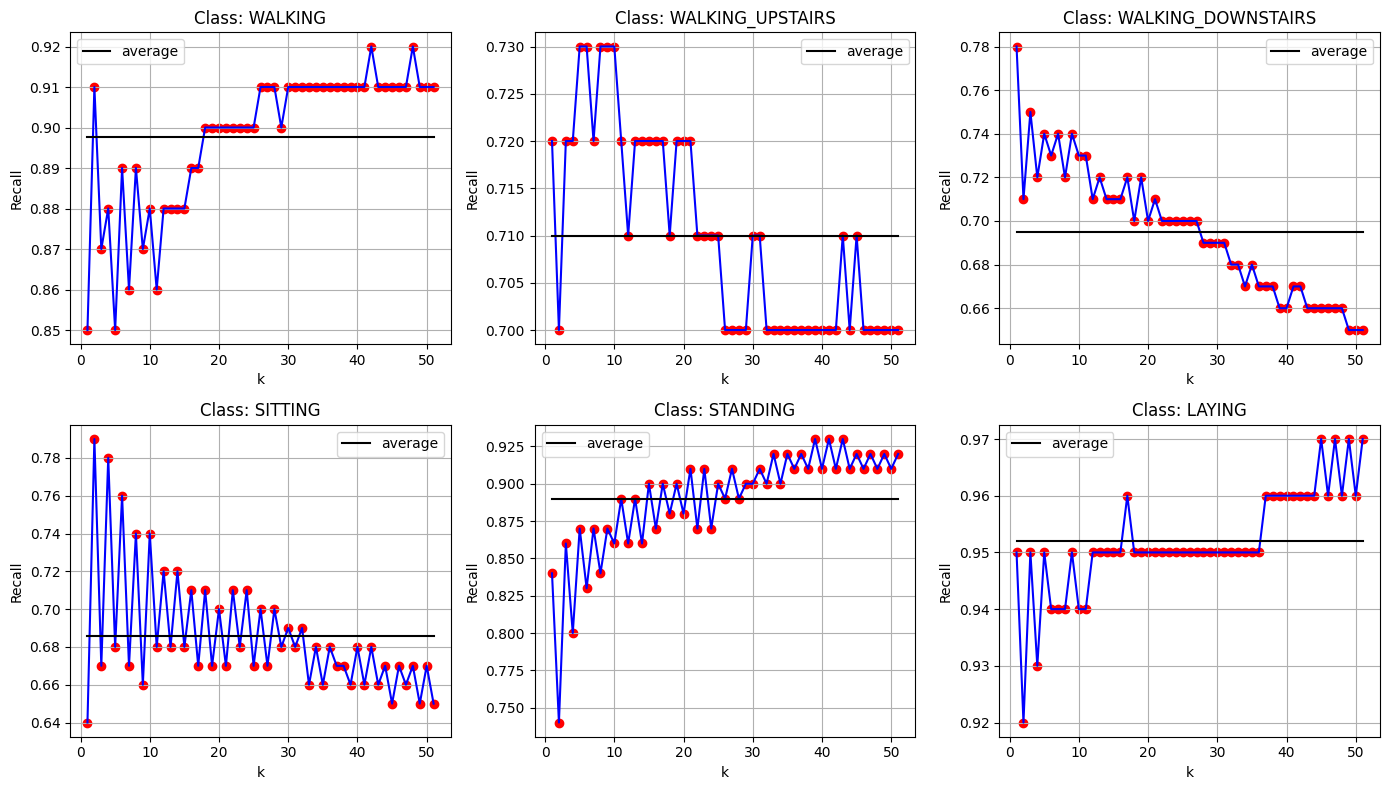

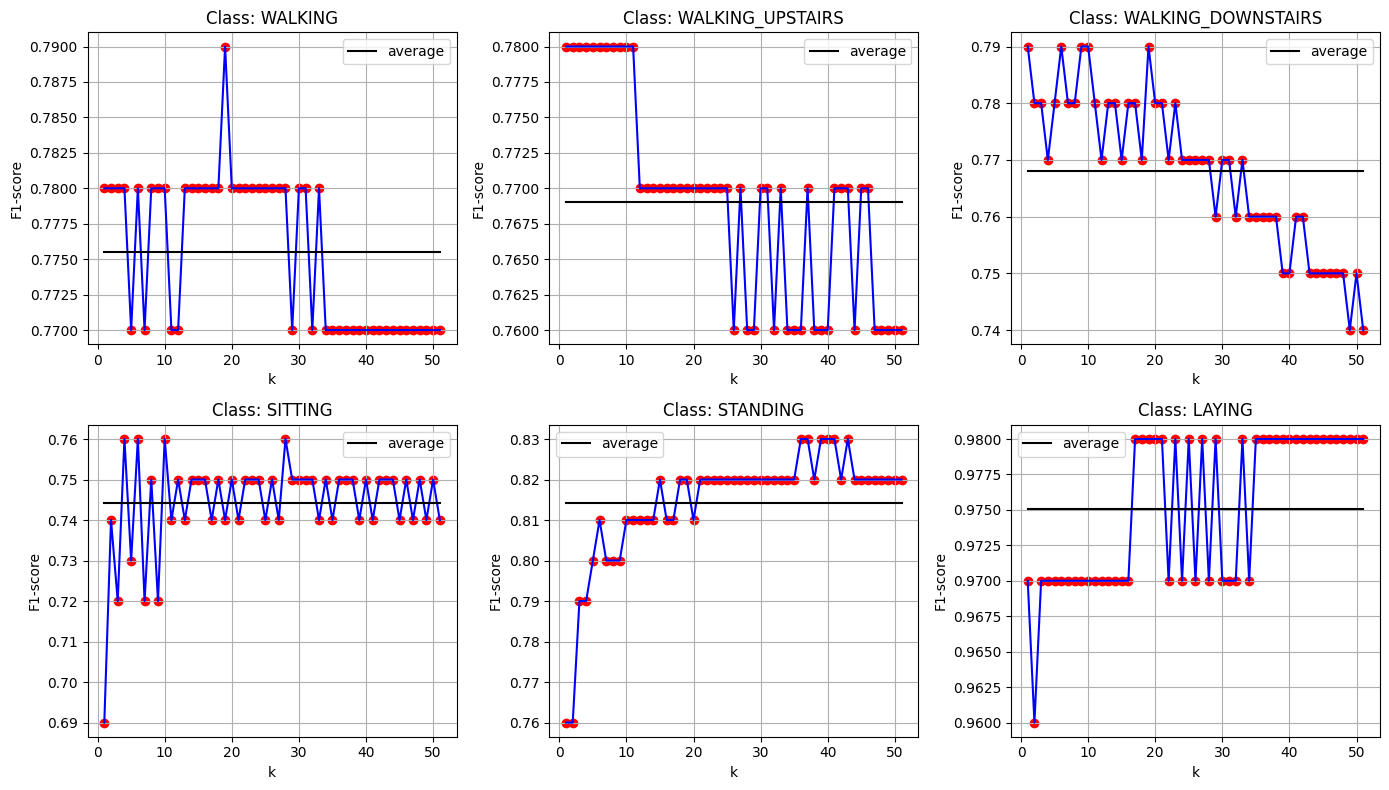

In [48]:
import statistics
def plot_curves_classes(curves=[], n=1, class_names=[], label='precision'):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

    for idx, ax in enumerate(axs.flat):
        curves_ = [float(valor) for valor in curves[idx]]
        ax.scatter(range(1,n+1), curves_ , color='red')
        ax.plot(range(1,n+1), curves_ , color='blue')
        ax.plot(range(1,n+1), np.full( n, statistics.mean(curves_)), color='black', label='average' )
        ax.legend(loc='best')
        ax.set_title('Class: ' + class_names[idx])
        ax.set_xlabel('k')
        ax.set_ylabel(label)
        ax.grid()

    plt.tight_layout()
    plt.savefig(f'{path_drive}/fig05_{label}.eps', format='eps')
    plt.show()

# Suponha que 'precision' seja uma lista de listas contendo as precisões para cada classe
# e 'n_range' seja a lista de valores de k
# dict_classes= { 1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING',
class_names = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
plot_curves_classes(precision, n_range, class_names)
plot_curves_classes(recall, n_range, class_names, 'Recall')
plot_curves_classes(f1_score, n_range, class_names, 'F1-score')
# plot_curves_classes(support, n_range, class_names, 'Support')


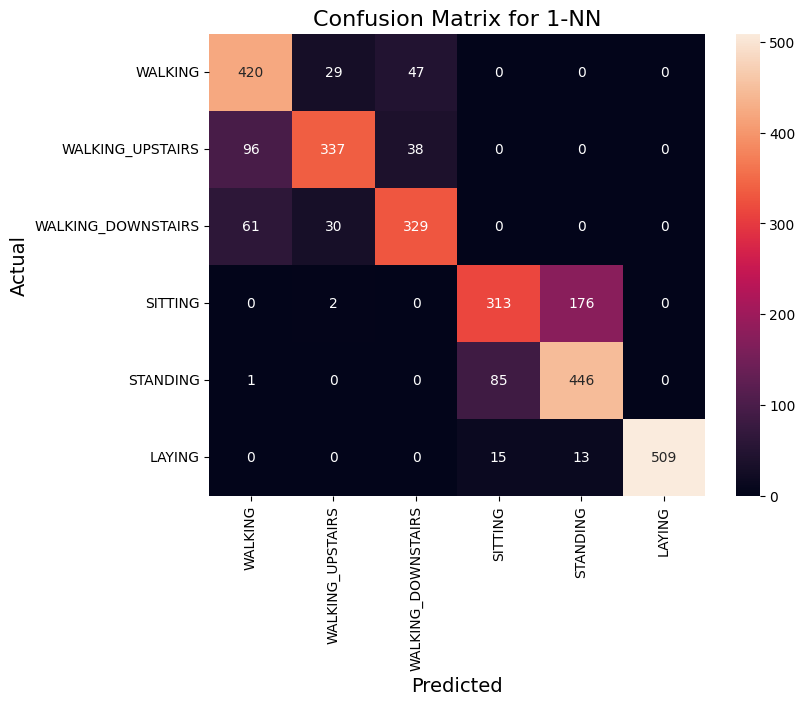

In [49]:
plot_conf_matrix( cm=conf_matrix_k[0], title="1-NN")

In [50]:
conf_matrix_k[0]

array([[420,  29,  47,   0,   0,   0],
       [ 96, 337,  38,   0,   0,   0],
       [ 61,  30, 329,   0,   0,   0],
       [  0,   2,   0, 313, 176,   0],
       [  1,   0,   0,  85, 446,   0],
       [  0,   0,   0,  15,  13, 509]])

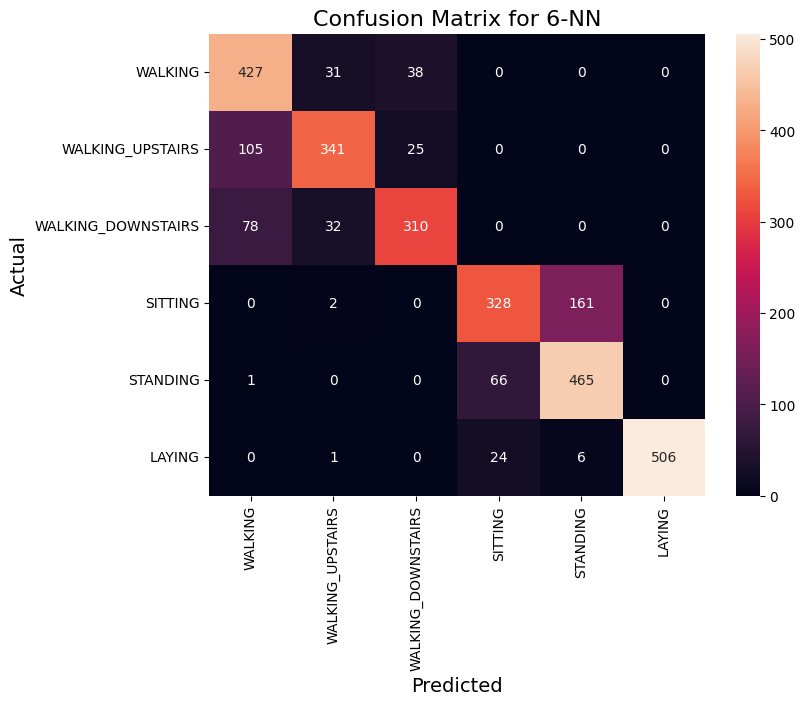

In [51]:
plot_conf_matrix( cm=conf_matrix_k[6], title="6-NN")

In [52]:
conf_matrix_k[1]

array([[452,  16,  28,   0,   0,   0],
       [118, 332,  21,   0,   0,   0],
       [ 89,  33, 298,   0,   0,   0],
       [  0,   2,   0, 390,  99,   0],
       [  1,   0,   0, 137, 394,   0],
       [  0,   0,   0,  34,  11, 492]])

### Other analysis

Change the parameters

In [54]:
acc_list_test = []
acc_list_train = []

acc_mac_list = []
acc_weight_avg = []

y_train_labels

precision = []
recall = []
f1_score = []
support = []

pred_k_list = []
conf_matrix_k = []
result_k_list = []

n_classes = 6

# Inicializa as listas de precisão, recall, f1-score e support para cada classe
for _ in range(n_classes):
    precision.append([])
    recall.append([])
    f1_score.append([])
    support.append([])

n_range=51
for k in range(1, n_range+1):
  knn_k= KNeighborsClassifier( n_neighbors= k )
  result_k= knn_k.fit(X_train, y_train.values.ravel())

  result_k_list.append(result_k)

  pred_k= knn_k.predict(X_test)
  pred_k_list.append(pred_k)

  conf_matrix_k.append( confusion_matrix(y_test, pred_k) )


  train_acc= knn_k.score(X_train, y_train)
  test_acc= knn_k.score(X_test, y_test)

  acc_list_train.append( train_acc )
  acc_list_test.append( test_acc )
  print('>%d, train: %.3f, test: %.3f' %(k, train_acc, test_acc))

  res_df = get_df_scores_to_each_class( classification_report(y_test, pred_k), n_classes, dict_classes )

  for i in range(0,n_classes):
    precision[i].append(res_df['precision'][i])
    recall[i].append(res_df['recall'][i])
    f1_score[i].append(res_df['f1-score'][i])
    support[i].append(res_df['support'][i])


# print(precision)
# print(recall)
# print(f1_score)
# print(support)

>1, train: 1.000, test: 0.799
>2, train: 0.993, test: 0.800
>3, train: 0.996, test: 0.806
>4, train: 0.992, test: 0.810
>5, train: 0.989, test: 0.808
>6, train: 0.988, test: 0.818
>7, train: 0.984, test: 0.807
>8, train: 0.983, test: 0.812
>9, train: 0.979, test: 0.808
>10, train: 0.978, test: 0.817
>11, train: 0.977, test: 0.812
>12, train: 0.976, test: 0.812
>13, train: 0.974, test: 0.812
>14, train: 0.974, test: 0.813
>15, train: 0.971, test: 0.814
>16, train: 0.970, test: 0.813
>17, train: 0.967, test: 0.813
>18, train: 0.967, test: 0.814
>19, train: 0.963, test: 0.816
>20, train: 0.964, test: 0.815
>21, train: 0.963, test: 0.815
>22, train: 0.963, test: 0.814
>23, train: 0.962, test: 0.816
>24, train: 0.962, test: 0.814
>25, train: 0.960, test: 0.813
>26, train: 0.960, test: 0.814
>27, train: 0.957, test: 0.814
>28, train: 0.957, test: 0.815
>29, train: 0.956, test: 0.812
>30, train: 0.956, test: 0.814
>31, train: 0.954, test: 0.815
>32, train: 0.955, test: 0.812
>33, train: 0.952

In [62]:
def variation_parameters_knn(alg="", w="", n_exe="", k=1):
  a=1
  knn_k1= KNeighborsClassifier( n_neighbors= k )
  result_k1= knn_k1.fit(X_train, y_train.values.ravel())

  pred_k1= knn_k1.predict(X_test)

  train_acc1= knn_k1.score(X_train, y_train)
  test_acc1= knn_k1.score(X_test, y_test)

  print('>%d, train: %.3f, test: %.3f' %(a, train_acc1, test_acc1))
  print(classification_report(y_test, pred_k1))

  # res_df = get_df_scores_to_each_class( classification_report(y_test, pred_k1), n_classes, dict_classes )

In [63]:
n_exe=1
for alg in ['ball_tree', 'kd_tree', 'brute']:
  for w in ['uniform', 'distance']:
    print(alg, w)
    variation_parameters_knn(alg, w, n_exe)
    n_exe+=1

ball_tree uniform
>1, train: 1.000, test: 0.799
              precision    recall  f1-score   support

           1       0.73      0.85      0.78       496
           2       0.85      0.72      0.78       471
           3       0.79      0.78      0.79       420
           4       0.76      0.64      0.69       491
           5       0.70      0.84      0.76       532
           6       1.00      0.95      0.97       537

    accuracy                           0.80      2947
   macro avg       0.80      0.79      0.80      2947
weighted avg       0.81      0.80      0.80      2947

ball_tree distance
>1, train: 1.000, test: 0.799
              precision    recall  f1-score   support

           1       0.73      0.85      0.78       496
           2       0.85      0.72      0.78       471
           3       0.79      0.78      0.79       420
           4       0.76      0.64      0.69       491
           5       0.70      0.84      0.76       532
           6       1.00      0.95  

In [65]:
n_exe=1
for alg in ['ball_tree', 'kd_tree', 'brute']:
  for w in ['uniform', 'distance']:
    print(alg, w)
    variation_parameters_knn(alg, w, n_exe,k=6)
    n_exe+=1

ball_tree uniform
>1, train: 0.988, test: 0.818
              precision    recall  f1-score   support

           1       0.70      0.89      0.78       496
           2       0.85      0.73      0.78       471
           3       0.85      0.73      0.79       420
           4       0.77      0.76      0.76       491
           5       0.78      0.83      0.81       532
           6       1.00      0.94      0.97       537

    accuracy                           0.82      2947
   macro avg       0.83      0.81      0.82      2947
weighted avg       0.83      0.82      0.82      2947

ball_tree distance
>1, train: 0.988, test: 0.818
              precision    recall  f1-score   support

           1       0.70      0.89      0.78       496
           2       0.85      0.73      0.78       471
           3       0.85      0.73      0.79       420
           4       0.77      0.76      0.76       491
           5       0.78      0.83      0.81       532
           6       1.00      0.94  

In [64]:
n_exe=1
for alg in ['ball_tree', 'kd_tree', 'brute']:
  for w in ['uniform', 'distance']:
    print(alg, w)
    variation_parameters_knn(alg, w, n_exe,k=20)
    n_exe+=1

ball_tree uniform
>1, train: 0.964, test: 0.815
              precision    recall  f1-score   support

           1       0.69      0.90      0.78       496
           2       0.84      0.72      0.77       471
           3       0.87      0.70      0.78       420
           4       0.80      0.70      0.75       491
           5       0.76      0.88      0.81       532
           6       1.00      0.95      0.98       537

    accuracy                           0.82      2947
   macro avg       0.83      0.81      0.81      2947
weighted avg       0.83      0.82      0.81      2947

ball_tree distance
>1, train: 0.964, test: 0.815
              precision    recall  f1-score   support

           1       0.69      0.90      0.78       496
           2       0.84      0.72      0.77       471
           3       0.87      0.70      0.78       420
           4       0.80      0.70      0.75       491
           5       0.76      0.88      0.81       532
           6       1.00      0.95  

In [61]:
pred_k_list[5]
print( classification_report(y_test, pred_k_list[5] ) )

              precision    recall  f1-score   support

           1       0.70      0.89      0.78       496
           2       0.85      0.73      0.78       471
           3       0.85      0.73      0.79       420
           4       0.77      0.76      0.76       491
           5       0.78      0.83      0.81       532
           6       1.00      0.94      0.97       537

    accuracy                           0.82      2947
   macro avg       0.83      0.81      0.82      2947
weighted avg       0.83      0.82      0.82      2947

